In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the MLP model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


C:\Users\Hp\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


11490434/11490434 [==============================] - 10s 1us/step
Epoch 1/5
750/750 [==============================] - 7s 8ms/step - loss: 0.3289 - accuracy: 0.9072 - val_loss: 0.1826 - val_accuracy: 0.9492
Epoch 2/5
750/750 [==============================] - 6s 9ms/step - loss: 0.1530 - accuracy: 0.9552 - val_loss: 0.1335 - val_accuracy: 0.9613
Epoch 3/5
750/750 [==============================] - 7s 9ms/step - loss: 0.1080 - accuracy: 0.9687 - val_loss: 0.1101 - val_accuracy: 0.9671
Epoch 4/5
750/750 [==============================] - 6s 8ms/step - loss: 0.0819 - accuracy: 0.9762 - val_loss: 0.0959 - val_accuracy: 0.9712
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0805 - accuracy: 0.9740
Test accuracy: 0.9739999771118164


Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2899 - accuracy: 0.9157
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1377 - accuracy: 0.9595
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1021 - accuracy: 0.9688
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0849 - accuracy: 0.9733
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0708 - accuracy: 0.9788
Test accuracy: 0.9787999987602234
1/1 [==============================] - 0s 238ms/step


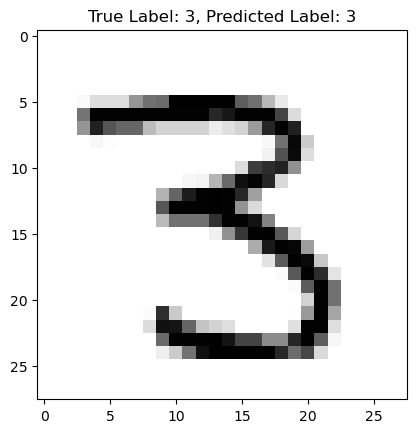

1/1 [==============================] - 0s 51ms/step


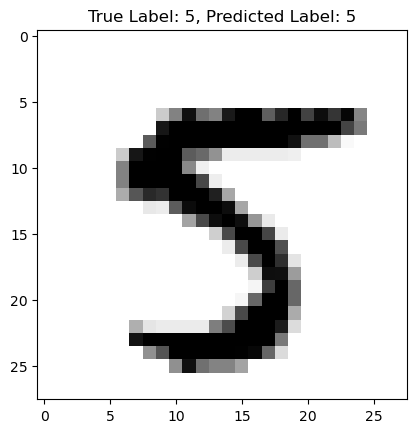

1/1 [==============================] - 0s 80ms/step


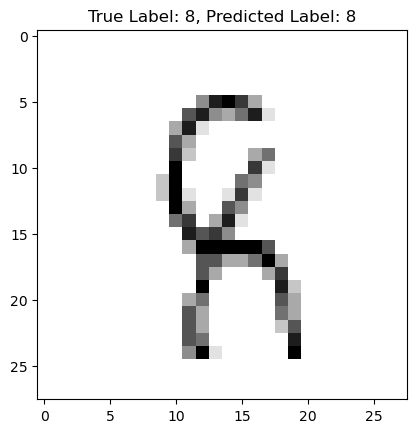

1/1 [==============================] - 0s 35ms/step


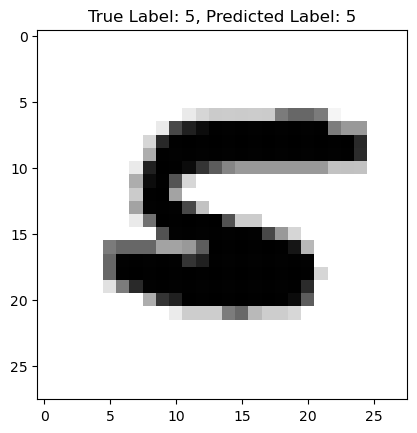

1/1 [==============================] - 0s 54ms/step


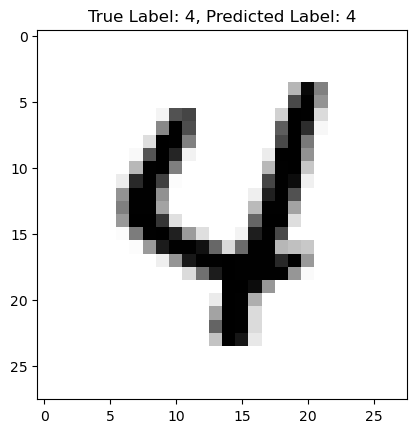

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Build the MLP model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Visualize some handwritten numbers
num_images_to_visualize = 5
indices_to_visualize = np.random.choice(len(test_images), num_images_to_visualize, replace=False)

for i in indices_to_visualize:
    image = test_images[i]
    label = test_labels[i]

    # Reshape the image from (28, 28) to (1, 28, 28) for prediction
    image = np.expand_dims(image, axis=0)

    # Make a prediction
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction)

    # Display the image and its true/predicted labels
    plt.figure()
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.title(f'True Label: {label}, Predicted Label: {predicted_label}')
    plt.show()
